In [107]:
# Load packages

import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier


In [56]:
import os
print(os.getcwd())  # This prints the current working directory

/Users/alexisvrd/ETH-Ultimate-Predictor/notebooks


In [57]:
#loading dataset
dataset = pd.read_csv('data/ETH_day.csv')

In [58]:
# Load dataset from the data folder
dataset = pd.read_csv('data/ETH_day.csv')

# Show the first few rows
print(dataset.head())


         Date  Symbol    Open    High     Low   Close  Volume ETH  Volume USD
0  2020-04-15  ETHUSD  158.61  158.61  158.61  158.61        0.00        0.00
1  2020-04-14  ETHUSD  156.97  162.15  155.74  158.61    18061.58  2872210.44
2  2020-04-13  ETHUSD  158.56  159.51  150.12  156.97    15698.32  2416728.28
3  2020-04-12  ETHUSD  158.66  165.37  155.21  158.56    12877.33  2082804.05
4  2020-04-11  ETHUSD  158.26  161.49  154.25  158.66    13761.72  2172914.57


In [59]:
dataset.shape

(1438, 8)

In [60]:
dataset.tail()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06


In [61]:
dataset.drop(columns='Symbol')

,Date,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...
1433,2016-05-13,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,9.98,9.98,9.36,9.68,672.06,6578.20


In [62]:
dataset.describe()

,Open,High,Low,Close,Volume ETH,Volume USD
count,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03,1.438000e+03
mean,239.397149,248.919200,227.681446,239.468011,3.720638e+04,1.139557e+07
std,237.662224,248.677428,222.794938,237.606382,6.908336e+04,2.143780e+07
min,6.770000,7.290000,5.990000,6.770000,0.000000e+00,0.000000e+00
25%,79.782500,84.875000,74.677500,80.732500,7.020215e+03,7.541171e+05
50%,181.430000,187.020000,175.850000,181.430000,1.780439e+04,3.221372e+06
75%,297.735000,306.015000,287.427500,297.502500,4.204451e+04,1.204918e+07
max,1381.850000,1420.010000,1270.000000,1381.850000,1.827755e+06,2.221193e+08


In [63]:
print(dataset.isnull().sum())

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume ETH    0
Volume USD    0
dtype: int64


In [64]:
dataset['price_change_pct'] = dataset['Close'].pct_change()
dataset['price_change_pct']

0            NaN
1       0.000000
2      -0.010340
3       0.010129
4       0.000631
          ...   
1433    0.042927
1434   -0.045837
1435    0.022549
1436   -0.071908
1437    0.030992
Name: price_change_pct, Length: 1438, dtype: float64

In [65]:
# Calculate 7-day and 30-day moving averages
dataset['ma7'] = dataset['Close'].rolling(window=7, min_periods=1, center=False).mean()
dataset['ma30'] = dataset['Close'].rolling(window=30, min_periods=1, center=False).mean()

In [66]:
dataset['price_change_pct'][0]=0

/var/folders/k7/xsgrrld55md5_brrg8y143v00000gn/T/ipykernel_14306/4206269279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_change_pct'][0]=0


In [67]:
dataset.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,price_change_pct,ma7,ma30
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00,0.000000,158.610000,158.610000
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44,0.000000,158.610000,158.610000
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28,-0.010340,158.063333,158.063333
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05,0.010129,158.187500,158.187500
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57,0.000631,158.282000,158.282000


In [68]:
dataset.tail()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,price_change_pct,ma7,ma30
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55,0.042927,11.771429,13.130000
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39,-0.045837,11.157143,12.999667
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11,0.022549,10.747143,12.881667
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20,-0.071908,10.382857,12.722000
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06,0.030992,10.184286,12.571000


## **Preparing the data for classification**

In [69]:
# Create the signals
dataset['signal'] = np.where(dataset['ma7'] > dataset['ma30'], 1.0, 0.0)

In [70]:
dataset['signal'].value_counts()

signal
0.0    753
1.0    685
Name: count, dtype: int64

## **Feature engineering**

In [75]:
# making the exponential moving average
# first making the function to calculate the exponential MA of the Close column & then convert into a series

def EMA(df,n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

In [76]:
dataset['EMA10'] = EMA(dataset, 10)

In [81]:
dataset['EMA30']= EMA(dataset, 30)
dataset['EMA200'] = EMA (dataset, 200)
dataset.tail()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,price_change_pct,ma7,ma30,signal,EMA10,EMA30,EMA200
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55,0.042927,11.771429,13.130000,0.0,11.798242,12.839822,21.141442
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39,-0.045837,11.157143,12.999667,0.0,11.507653,12.669511,21.032572
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11,0.022549,10.747143,12.881667,0.0,11.311716,12.525026,20.927073
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20,-0.071908,10.382857,12.722000,0.0,11.015040,12.341476,20.815162
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06,0.030992,10.184286,12.571000,0.0,10.826851,12.189123,20.707350


In [83]:
# Compact calculation of Rate of Change
dataset['ROC10'] = dataset['Close'].pct_change(10) * 100
dataset['ROC30'] = dataset['Close'].pct_change(30) * 100

In [87]:
# Compute the momentum

dataset['MOM10'] = dataset['Close'].diff(10)
dataset['MOM30'] = dataset['Close'].diff(30)

In [90]:
# compute the Relative strength index
import talib

dataset['RSI10'] = talib.RSI(dataset['Close'], timeperiod=10)
dataset['RSI30'] = talib.RSI(dataset['Close'], timeperiod=30)
dataset['RSI200'] = talib.RSI(dataset['Close'], timeperiod=200)

In [91]:
dataset

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,price_change_pct,ma7,...,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00,0.000000,158.610000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44,0.000000,158.610000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28,-0.010340,158.063333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05,0.010129,158.187500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57,0.000631,158.282000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55,0.042927,11.771429,...,11.798242,12.839822,21.141442,-21.107011,-32.126984,-2.86,-5.06,34.873716,44.429791,45.623813
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39,-0.045837,11.157143,...,11.507653,12.669511,21.032572,-28.169014,-27.710843,-4.00,-3.91,32.180649,43.407177,45.592358
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11,0.022549,10.747143,...,11.311716,12.525026,20.927073,-25.340014,-25.340014,-3.54,-3.54,34.806340,44.032676,45.610048
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20,-0.071908,10.382857,...,11.015040,12.341476,20.815162,-30.359712,-33.102972,-4.22,-4.79,30.524508,42.449972,45.561501


In [93]:
#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [94]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)

In [96]:
#excluding rows that are not needed for our prediction.
dataset=dataset.drop(['High','Low','Open'], axis=1)

In [100]:
dataset.tail()

,Date,Symbol,Close,Volume ETH,Volume USD,ma7,ma30,signal,EMA10,EMA30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
1433,2016-05-13,ETHUSD,10.69,1769.71,18923.55,11.771429,13.130000,0.0,11.798242,12.839822,...,45.623813,14.285714,6.442577,11.258278,5.077263,17.707736,15.663801,12.447,13.130000,12.12970
1434,2016-05-12,ETHUSD,10.20,2072.56,22183.39,11.157143,12.999667,0.0,11.507653,12.669511,...,45.592358,5.773196,8.366976,4.567700,6.599829,14.899713,15.931232,12.047,12.999667,12.13685
1435,2016-05-11,ETHUSD,10.43,3052.51,30978.11,10.747143,12.881667,0.0,11.311716,12.525026,...,45.610048,14.734774,11.597895,11.773940,9.199973,16.217765,16.275072,11.693,12.881667,12.14445
1436,2016-05-10,ETHUSD,9.68,672.06,6578.20,10.382857,12.722000,0.0,11.015040,12.341476,...,45.561501,6.225681,8.911217,4.783259,7.041633,11.919771,14.345750,11.271,12.722000,12.14535
1437,2016-05-09,ETHUSD,9.98,1317.90,12885.06,10.184286,12.571000,0.0,10.826851,12.189123,...,45.584785,13.362069,11.440841,9.267564,8.608254,13.638968,13.925501,10.819,12.571000,12.14770


In [99]:
dataset = dataset.dropna(axis=0)

In [109]:
dataset.set_index('Date', inplace=True)


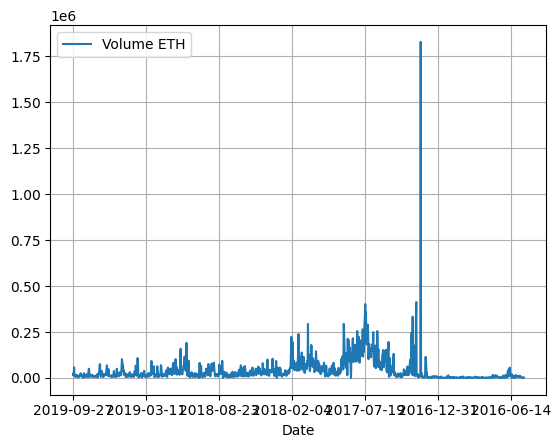

In [110]:
dataset[['Volume ETH']].plot(grid=True)
plt.show()